In [ ]:
# !pip install facebook_scraper
# from facebook_scraper import get_posts
import pandas as pd
import numpy as np
import time
import pickle
from csv import DictWriter
from os import walk
import pickle
import traceback
import os
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from deep_translator import GoogleTranslator

!pip install langdetect
from langdetect import detect


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


     |████████████████████████████████| 981 kB 9.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b0506d5397dff87242ca61e7cf19e7065c098b1c3155f07dcc6d57d2f252177d
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


#Fetch post and write it to csv

In [ ]:
with open('/content/drive/MyDrive/Colab-Notebooks/IR/Project/narendramodi_postIds', 'rb') as handle:
   narendramodi_postIds = pickle.load(handle)

len(narendramodi_postIds)

50

In [ ]:
path = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/priyankagandhivadra.csv'
req_count = 0
post_data = []
fb_id_name = 'DrRPNishank'
field_names = ['post_id', 'text', 'time', 'link', 'video','images', 'comment_text','comment_time']

# get using https://chrome.google.com/webstore/detail/editthiscookie/fngmhnnpilhplaeedifhccceomclgfbg?hl=en and save in text file
with open(path, 'a') as fb_id_name:
  for post in get_posts(fbIdName, cookies='./cookies3.txt', pages=20, options={"comments": True,"posts_per_page": 60, "progress": True, "comments": 600}):
    
    if(req_count==60): 
      print(' 60 post fetched')
      break
    
    tmp= dict()

    tmp['post_id'] = post['post_id']
    tmp['text'] = post['text']
    tmp['time'] = post['time']
    tmp['link'] = post['link']
    tmp['video'] = post['video']
    tmp['images'] = post['images']
    if not tmp['images']: tmp['images'] = None

    time.sleep( 1.0 +  np.random.uniform(0,2))

    lst1=[]
    lst2=[]
    # go through all comments
    for cmt in post['comments_full']:
      # when someone put sticker as comment then cmt['comment_text'] showing name of user, so we ignore those comments 
      if(str(cmt['commenter_name']).strip() != str(cmt['comment_text']).strip()):
        lst1.append(cmt['comment_text'])
        lst2.append(cmt['comment_time'])
      
    time.sleep( 1.0 +  np.random.uniform(0,2)+  np.random.uniform(0,3) ) # to avoid from ban, put gap between fetching posts

    if lst1: tmp['comment_text'],tmp['comment_time'] = lst1, lst2
    else: tmp['comment_time'],tmp['comment_time'] = None, None

    writrtObj = DictWriter(csvfileObj, fieldnames=field_names)
    writrtObj.writerow(tmp)

    req_count += 1
    print(req_count,post['post_id'], ' done successfully ')
  

#Post Processing

In [ ]:
mypath = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets'
file_Names = []
for (dirpath, dirnames, filenames) in walk(mypath):
    file_Names.extend(filenames)
file_Names

['nitingadkary.csv',
 'priyankagandhivadra.csv',
 'narendramodi.csv',
 'MYogiAdityanath.csv',
 'SmritiIraniOfficial.csv',
 'MamataBanerjeeOfficial.csv',
 'amitshahofficial.csv',
 'AAPkaArvind.csv',
 'RajnathSinghBJP.csv',
 'rahulgandhi.csv']

In [ ]:
field_names = ['post_id', 'text', 'time', 'link', 'video','images', 'comment_text','comment_time']
df = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets/narendramodi.csv',names = field_names)
df.head()

,post_id,text,time,link,video,images,comment_text,comment_time
0,10166271848125165,Let’s conserve water! #WorldWaterDay,2022-03-22 11:28:00,https://media2.giphy.com/media/xUPGcoX18789cbA...,https://video-atl3-2.xx.fbcdn.net/v/t42.1790-2...,NaN,['जल ही जीवन है 🙏विश्व जल दिवस की सभी को हार्द...,"[datetime.datetime(2022, 3, 21, 0, 0), datetim..."
1,10166271828035165,Joined the ceremony in which Padma Awards were...,2022-03-22 11:09:00,NaN,NaN,['https://scontent-atl3-2.xx.fbcdn.net/v/t39.3...,['Heartiest congratulations\nto all 💐💐\nVande ...,"[datetime.datetime(2022, 3, 21, 0, 0), datetim..."
2,10166270321115165,The return of our priceless heritage from Aust...,2022-03-21 22:18:00,NaN,https://video-atl3-2.xx.fbcdn.net/v/t42.1790-2...,NaN,['भारत के सर्वमान्य नेता आदरणीय मोदी जी को साद...,"[datetime.datetime(2022, 3, 21, 0, 0), datetim..."
3,10166270043555165,Congratulations to Shri N.Biren Singh Ji on be...,2022-03-21 19:58:00,NaN,NaN,['https://scontent-atl3-2.xx.fbcdn.net/v/t39.3...,"['हार्दिक बधाई एवं शुभकामनाएं', 'Heartiest con...","[datetime.datetime(2022, 3, 21, 0, 0), datetim..."
4,10166269905025165,Deeply shocked and saddened to learn about the...,2022-03-21 18:52:00,NaN,NaN,NaN,"['Very sad to hear this .. deep Condolences', ...","[datetime.datetime(2022, 3, 21, 0, 0), datetim..."


In [ ]:
df2 = df.copy()
def comment_str_to_list2(df2):
  df2['comments_strTOlst'] = df2['comment_text'].apply(lambda X: X.split(',')) # comments_full is in string form so convert it to list from
  
  def fun(lst):
    for i in range(len(lst)):
      lst[i]= lst[i].strip("\\'[] ")
    return lst
    
  df2['comments_lst'] = df2['comments_strTOlst'].apply(fun) 
  
  df2.loc[0]['comments_lst'][:5]

def comment_str_to_list2(pd_series):
  df2['comments_strTOlst'] = df2['comment_text'].apply(lambda X: X.split(',')) # comments_full is in string form so convert it to list from
  
  def fun(lst):
    for i in range(len(lst)):
      lst[i]= lst[i].strip("\\'[] ")
    return lst
    
  df2['comments_lst'] = df2['comments_strTOlst'].apply(fun) 
  #df2.head()
  df2.loc[0]['comments_lst'][:5]

['जल ही जीवन है 🙏विश्व जल दिवस की सभी को हार्दिक बधाई 🙏🙏🙏जय हिंद 🇮🇳',
 '"जल ही जीवन है"\\n\\nविश्व जल दिवस की अनंत शुभकामनाएं। आइये',
 'विश्व जल दिवस पर हम सब जल संरक्षण का संकल्प लें।\\n#WorldWaterDay',
 'जय हिंद जय भारत जय समाजवाद🙏🙏🙏🙏',
 'Please someone teach this save water lesson to bollywood']

In [ ]:
# convert string dates to list
def date_str_to_list2(df2):
  df2['comment_time'] = df2['comment_time'].apply(lambda x: x.strip('[]'))
  df2['comment_time_'] = df2['comment_time'].apply(lambda X: X.split('),')) # comments_full is in string form so convert it to list from

  #lst to comment
  def fun(lst):
    for i in range(len(lst)):
      lst[i]= lst[i].strip("\\'[],datetime.datetime( ")
      lst[i] = lst[i].split(',')
    return lst
    
  df2['comments_time_lst'] = df2['comment_time_'].apply(fun) 
  print(df2.loc[0]['comments_time_lst'][:5])

[['2022', ' 3', ' 21', ' 0', ' 0'], ['2022', ' 3', ' 22', ' 0', ' 0'], ['2022', ' 3', ' 22', ' 0', ' 0'], ['2022', ' 3', ' 23', ' 0', ' 0'], ['2022', ' 3', ' 22', ' 0', ' 0']]


# string list to list

In [ ]:
def strip_cmt(lst):
    for i in range(len(lst)):
      lst[i]= lst[i].strip("\\'[] ") # strip whenever we find char like... \'[] and space
    return lst

def strip_date(lst):
    for i in range(len(lst)):
      lst[i]= lst[i].strip("\\'[],datetime.datetime( ")
      lst[i] = lst[i].split(',')
    return lst

def update_df(df2, path, fileName):
  
  df2['comments_lst'] = df2['comment_text'].apply(lambda X: str(X).split(',')) # comments_full is in string form so convert it to list from
  
  df2 = df2.drop(['comment_text'],axis=1)
    
  df2['comments_lst'] = df2['comments_lst'].apply(strip_cmt)

  #######################################################

  df2['comment_time'] = df2['comment_time'].apply(lambda X: str(X).strip('[]'))
  df2['comment_time'] = df2['comment_time'].apply(lambda X: str(X).split('),')) # comments_full is in string form so convert it to list from

  df2['comments_time_lst'] = df2['comment_time'].apply(strip_date)
  df2= df2.drop(['comment_time'],axis=1)

  fileName = fileName.split('.')
  with open(path+'/'+fileName[0], 'wb') as fp:
    pickle.dump(df2, fp)

In [ ]:
path_old = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets'
path_new = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle'
field_names = ['post_id', 'text', 'time', 'link', 'video','images', 'comment_text','comment_time']
file_Names = []
for (dirpath, dirnames, filenames) in walk(path_old):
  for filename in filenames:
    df2 = pd.read_csv(dirpath+'/'+ filename, names = field_names)
    print(filename,'--- start')
    file_Names.append(filename)
    update_df(df2, path_new, filename)

narendramodi.csv --- start
SmritiIraniOfficial.csv --- start
amitshahofficial.csv --- start
MYogiAdityanath.csv --- start
RajnathSinghBJP.csv --- start
AAPkaArvind.csv --- start
nitingadkary.csv --- start
MamataBanerjeeOfficial.csv --- start
rahulgandhi.csv --- start
priyankagandhivadra.csv --- start


In [ ]:
pp= path_new+'/'+'AAPkaArvind'
with open(pp, 'rb') as fp:
  df3 = pickle.load(fp)

df3.head()

In [ ]:
df3['comments_lst'][0][0],df3['comments_time_lst'][0][0]

('Really Sir', ['2022', ' 3', ' 24', ' 0', ' 0'])

#Assign language tag

In [ ]:
import re
def detect_post_lang(txt):
  
  try:
    lang=detect(re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(txt)))
    if(lang=='en' or lang=='hi' or lang=='gu'):
      return lang
    else:
      return 'other'
  except:
    return 'other'

def detect_comments_lang(txt_lst):
  langs = []
  for txt in txt_lst:
    try:
      lang=detect(re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(txt)))
      if(lang=='en' or lang=='hi' or lang=='gu'):
        langs.append(lang)
      else:
        langs.append('other')
    except:
      langs.append('other')

  return langs

path_old2 = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle'
path_new2 = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle_v2'

for (dirpath, dirnames, filenames) in walk(path_old2):
  for filename in filenames:
    f = dirpath+'/'+ filename
    if os.path.isfile(f):
      print(filename)
      with open(f, 'rb') as fp:
        df = pickle.load(fp)
        
        df['post_lang'] = df['text'].apply(detect_post_lang)
        df['comments_lang'] = df['comments_lst'].apply(detect_comments_lang)

        with open(path_new2+'/'+ filename, 'wb') as fp2:
          pickle.dump(df, fp2)

narendramodi
SmritiIraniOfficial
amitshahofficial
MYogiAdityanath
RajnathSinghBJP
AAPkaArvind
nitingadkary
MamataBanerjeeOfficial
rahulgandhi
priyankagandhivadra


In [ ]:
path_new2 = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle_v2'
with open(path_new2+'/'+'MamataBanerjeeOfficial', 'rb') as fp:
        pp = pickle.load(fp)
pp.head()

,post_id,text,time,link,video,images,comments_lst,comments_time_lst,post_lang,comments_lang
0,972835906682156,Distribution of Widow Pension and other GoWB s...,2022-03-27 09:20:03,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t66.362...,NaN,[Correct you are dr bishop peter aloke Mukherj...,"[[2022, 3, 27, 10, 2, 18], [2022, 3, 27...",en,"[en, en, en, en, en, other, en, en, en, en, en..."
1,5294113203989311,NaN,2022-03-26 03:34:07,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,"[মহান সংগীতজ্ঞ, সুরকার এবং সংগীতশিল্পী আনন্দ স...","[[2022, 3, 25, 0, 0], [2022, 3, 25, 0, ...",other,"[other, other, en, en, other, en, en, en, othe..."
2,5291243004276331,NaN,2022-03-25 02:38:54,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,[পদ্মশ্রী পুরস্কার প্রাপ্ত প্রখ্যাত হকি খেলোয়া...,"[[2022, 3, 24, 0, 0], [2022, 3, 24, 0, ...",other,"[other, en, en, other, en, other, other, other..."
3,1798319360372298,রামপুরহাটে সাংবাদিক সম্মেলন।,2022-03-24 08:34:31,NaN,https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,"[মা মাটি মানুষ জিন্দাবাদ, মমতা ব্যানার্জি জিন্...","[[2022, 3, 24, 0, 0], [2022, 3, 24, 0, ...",other,"[other, other, other, other, other, en, other,..."
4,449855290163024,রামপুরহাটে সাংবাদিক সম্মেলন।,2022-03-24 07:54:49,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t66.362...,NaN,[Money is not resolution.Ples\nse find the roo...,"[[2022, 3, 24, 0, 0], [2022, 3, 24, 0, ...",other,"[en, en, other, en, en, en, en, en, other, en,..."


In [ ]:
sorted_df = pp.sort_values(by=['time'], ascending=False)

In [ ]:
sorted_df

,post_id,text,time,link,video,images,comments_lst,comments_time_lst,post_lang,comments_lang
0,972835906682156,Distribution of Widow Pension and other GoWB s...,2022-03-27 09:20:03,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t66.362...,NaN,[Correct you are dr bishop peter aloke Mukherj...,"[[2022, 3, 27, 10, 2, 18], [2022, 3, 27...",en,"[en, en, en, en, en, other, en, en, en, en, en..."
1,5294113203989311,NaN,2022-03-26 03:34:07,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,"[মহান সংগীতজ্ঞ, সুরকার এবং সংগীতশিল্পী আনন্দ স...","[[2022, 3, 25, 0, 0], [2022, 3, 25, 0, ...",other,"[other, other, en, en, other, en, en, en, othe..."
2,5291243004276331,NaN,2022-03-25 02:38:54,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,[পদ্মশ্রী পুরস্কার প্রাপ্ত প্রখ্যাত হকি খেলোয়া...,"[[2022, 3, 24, 0, 0], [2022, 3, 24, 0, ...",other,"[other, en, en, other, en, other, other, other..."
3,1798319360372298,রামপুরহাটে সাংবাদিক সম্মেলন।,2022-03-24 08:34:31,NaN,https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,"[মা মাটি মানুষ জিন্দাবাদ, মমতা ব্যানার্জি জিন্...","[[2022, 3, 24, 0, 0], [2022, 3, 24, 0, ...",other,"[other, other, other, other, other, en, other,..."
4,449855290163024,রামপুরহাটে সাংবাদিক সম্মেলন।,2022-03-24 07:54:49,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t66.362...,NaN,[Money is not resolution.Ples\nse find the roo...,"[[2022, 3, 24, 0, 0], [2022, 3, 24, 0, ...",other,"[en, en, other, en, en, en, en, en, other, en,..."
5,764075101237750,নতুন আবেদনকারীদের বিধবা ভাতা প্রদানের শুভ সূচনা,2022-03-23 07:06:55,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t66.362...,NaN,"[""Just as Bengalis and Bengalis took to the st...","[[2022, 3, 23, 0, 0], [2022, 3, 23, 0, ...",other,"[en, en, en, other, other, other, other, other..."
6,5285886231478675,NaN,2022-03-23 03:11:16,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,"[""My respectful tributes to A super brave hero...","[[2022, 3, 26, 0, 0], [2022, 3, 23, 0, ...",other,"[en, en, en, other, en, en, other, other, othe..."
7,5283269988406966,NaN,2022-03-22 02:33:36,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,[I convey my respectful tributes to the great ...,"[[2022, 3, 21, 0, 0], [2022, 3, 21, 0, ...",other,"[en, en, en, other, other, other, other, other..."
8,5278188992248399,NaN,2022-03-20 02:18:43,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,[My sincere tributes to the legendary Olympian...,"[[2022, 3, 20, 10, 43, 2], [2022, 3, 20...",other,"[en, en, other, other, en, other, other, other..."
9,5275686885831943,NaN,2022-03-19 02:42:21,NaN,NaN,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,"[happy Holi 💚💐💚, आप सभी को होली की ढेर सारी शु...","[[2022, 3, 20, 10, 43, 51], [2022, 3, 2...",other,"[other, other, other, other, other, other, oth..."


In [ ]:
GoogleTranslator(source='auto', target='en').translate('Interaction with student returnees from Ukrain')

'Interaction with student returnees from Ukrain'

In [ ]:
pp.loc[0]['comments_lang'][:5]

['hi', 'hi', 'hi', 'other', 'en']

#Post and comments lang count

In [ ]:
eng_post, hindi_post, guj_post, other_post = 0,0,0,0
eng_comments, hindi_comments, guj_comments, other_comments = 0,0,0,0

def post_lang_count(lang):
  
  if(lang=='en'): eng_post+=1
  if(lang=='hi'): hindi_post+=1
  if(lang=='gu'): guj_post+=1
  if(lang=='other'): other_post+=1

  return [eng_post, hindi_post, guj_post, other_post]

def comments_lang_count(lang_lst):
  
  for lang in lang_lst:
    if(lang=='en'): eng_comments+=1
    if(lang=='hi'): hindi_comments+=1
    if(lang=='gu'): guj_comments+=1
    if(lang=='other'): other_comments+=1
  
  return [eng_comments, hindi_comments, guj_comments, other_comments]


for (dirpath, dirnames, filenames) in walk(path_new2):
  for filename in filenames:
    f = dirpath+'/'+ filename

    dict1 = {}
    with open(f, 'rb') as fp:
      df = pickle.load(fp)

      dict1['user'] = filename

      eng_post, hindi_post, guj_post, other_post = df.post_lang['post_lang'].apply(post_lang_count)
      dict1['eng_post'] = eng_post
      dict1['hindi_post'] = hindi_post
      dict1['guj_post'] = guj_post
      dict1['other_post'] = other_post

      eng_comments, hindi_comments, guj_comments, other_comments = df.post_lang['comments_lang'].apply(comments_lang_count)
      dict1['eng_comments'] = eng_comments
      dict1['hindi_comments'] = hindi_comments
      dict1['guj_comments'] = guj_comments

In [ ]:
eng_post, hindi_post, guj_post, other_post = 0,0,0,0
eng_comments, hindi_comments, guj_comments, other_comments = 0,0,0,0

def post_lang_count(post_lang_col):
  global eng_post, hindi_post, guj_post, other_post
  eng_post, hindi_post, guj_post, other_post = 0,0,0,0
  for lang in post_lang_col:

    if(lang=='en'): eng_post+=1
    if(lang=='hi'): hindi_post+=1
    if(lang=='gu'): guj_post+=1
    if(lang=='other'): other_post+=1

  return eng_post, hindi_post, guj_post, other_post

def comments_lang_count(cmt_lang_lst):
  global eng_comments, hindi_comments, guj_comments, other_comments

  eng_comments, hindi_comments, guj_comments, other_comments = 0,0,0,0

  for lang_lst in cmt_lang_lst:
    for lang in lang_lst:
      if(lang=='en'): eng_comments+=1
      if(lang=='hi'): hindi_comments+=1
      if(lang=='gu'): guj_comments+=1
      if(lang=='other'): other_comments+=1
  
  return eng_comments, hindi_comments, guj_comments, other_comments


dict1 = {'user':[], 'eng_post': [], 'hindi_post' : [], 'guj_post' : [], 'other_post': [], 'eng_comments':[], 'hindi_comments':[], 'guj_comments':[], 'other_comments':[] }
lst=[]
c=0
df_count = pd.DataFrame()
for (dirpath, dirnames, filenames) in walk(path_new2):
  
  for filename in filenames:
    f = dirpath+'/'+ filename
    
    with open(f, 'rb') as fp:
      df = pickle.load(fp)
      
      dict1['user'].append(filename)

      eng_post, hindi_post, guj_post, other_post = post_lang_count(df['post_lang'])
      dict1['eng_post'].append(eng_post)
      dict1['hindi_post'].append(hindi_post)
      dict1['guj_post'].append(guj_post)
      dict1['other_post'].append(other_post)

      eng_comments, hindi_comments, guj_comments, other_comments = comments_lang_count(df['comments_lang'])
      dict1['eng_comments'].append(eng_comments)
      dict1['hindi_comments'].append(hindi_comments)
      dict1['guj_comments'].append(guj_comments)
      dict1['other_comments'].append(other_comments)

      c+=1
      print(dict1)
      df_count.append(dict1, ignore_index = True)
      lst.append(dict1)

{'user': ['narendramodi'], 'eng_post': [34], 'hindi_post': [0], 'guj_post': [0], 'other_post': [16], 'eng_comments': [14571], 'hindi_comments': [0], 'guj_comments': [0], 'other_comments': [16785]}
{'user': ['narendramodi', 'SmritiIraniOfficial'], 'eng_post': [34, 37], 'hindi_post': [0, 0], 'guj_post': [0, 0], 'other_post': [16, 3], 'eng_comments': [14571, 1634], 'hindi_comments': [0, 0], 'guj_comments': [0, 0], 'other_comments': [16785, 4230]}
{'user': ['narendramodi', 'SmritiIraniOfficial', 'amitshahofficial'], 'eng_post': [34, 37, 6], 'hindi_post': [0, 0, 0], 'guj_post': [0, 0, 0], 'other_post': [16, 3, 32], 'eng_comments': [14571, 1634, 2751], 'hindi_comments': [0, 0, 0], 'guj_comments': [0, 0, 0], 'other_comments': [16785, 4230, 12941]}
{'user': ['narendramodi', 'SmritiIraniOfficial', 'amitshahofficial', 'MYogiAdityanath'], 'eng_post': [34, 37, 6, 35], 'hindi_post': [0, 0, 0, 0], 'guj_post': [0, 0, 0, 0], 'other_post': [16, 3, 32, 3], 'eng_comments': [14571, 1634, 2751, 3462], 'hin

In [ ]:
df3 = pd.DataFrame(dict1)
df3

,user,eng_post,hindi_post,guj_post,other_post,eng_comments,hindi_comments,guj_comments,other_comments
0,narendramodi,34,0,0,16,14571,0,0,16785
1,SmritiIraniOfficial,37,0,0,3,1634,0,0,4230
2,amitshahofficial,6,0,0,32,2751,0,0,12941
3,MYogiAdityanath,35,0,0,3,3462,0,0,20264
4,RajnathSinghBJP,36,0,0,1,2343,0,0,12778
5,AAPkaArvind,52,0,0,3,13139,0,0,20213
6,nitingadkary,59,0,0,1,2297,0,0,4704
7,MamataBanerjeeOfficial,5,0,0,17,1672,0,0,10687
8,rahulgandhi,34,0,0,3,4917,0,0,17963
9,priyankagandhivadra,33,0,0,4,3718,0,0,14108


In [ ]:
with open(path_new2, 'rb') as fp:
      df = pickle.load(fp)

""


In [ ]:
dict1

{'eng_post': [34, 37, 6, 35, 36, 52, 59, 5, 34, 33],
 'guj_post': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'hindi_post': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'other_post': [16, 3, 32, 3, 1, 3, 1, 17, 3, 4],
 'user': ['narendramodi',
  'SmritiIraniOfficial',
  'amitshahofficial',
  'MYogiAdityanath',
  'RajnathSinghBJP',
  'AAPkaArvind',
  'nitingadkary',
  'MamataBanerjeeOfficial',
  'rahulgandhi',
  'priyankagandhivadra']}

In [ ]:
lst

[{'eng_comments': 3718,
  'eng_post': 33,
  'guj_comments': 0,
  'guj_post': 0,
  'hindi_comments': 0,
  'hindi_post': 0,
  'other_comments': 14108,
  'other_post': 4,
  'user': 'priyankagandhivadra'},
 {'eng_comments': 3718,
  'eng_post': 33,
  'guj_comments': 0,
  'guj_post': 0,
  'hindi_comments': 0,
  'hindi_post': 0,
  'other_comments': 14108,
  'other_post': 4,
  'user': 'priyankagandhivadra'},
 {'eng_comments': 3718,
  'eng_post': 33,
  'guj_comments': 0,
  'guj_post': 0,
  'hindi_comments': 0,
  'hindi_post': 0,
  'other_comments': 14108,
  'other_post': 4,
  'user': 'priyankagandhivadra'},
 {'eng_comments': 3718,
  'eng_post': 33,
  'guj_comments': 0,
  'guj_post': 0,
  'hindi_comments': 0,
  'hindi_post': 0,
  'other_comments': 14108,
  'other_post': 4,
  'user': 'priyankagandhivadra'},
 {'eng_comments': 3718,
  'eng_post': 33,
  'guj_comments': 0,
  'guj_post': 0,
  'hindi_comments': 0,
  'hindi_post': 0,
  'other_comments': 14108,
  'other_post': 4,
  'user': 'priyankagandh

#Sentimental analysis

In [1]:
import pickle
def store_data(var, var_name_str, path):
  with open(path+var_name_str, 'wb') as obj: # path must include / at end
      pickle.dump(var, obj, protocol=pickle.HIGHEST_PROTOCOL)

def load_data(var_name_str, path):
  with open(path+var_name_str, 'rb') as obj:
      data = pickle.load(obj)
  return data

In [ ]:
import re
import nltk
# nltk.download('stopwords')
# stopwords = set(nltk.corpus.stopwords.words("english"))
# nltk.download('punkt')
# nltk.download('wordnet')
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install deep_translator
from deep_translator import GoogleTranslator

     |████████████████████████████████| 128 kB 12.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def text_to_tokens(text):

    text = re.sub(r'[^\w\s]', '', text) # remove punctuation

    text = re.sub(r'[\d+]', '', text.lower()) # remove numerical values and convert to lower case

    return text #' '.join(tokens)

def pre_process_str(txt):
  
  try:
    x = re.sub(r'http\S+', '',str(txt)) # remove link
    x = re.sub(r'www\S+', '',str(x)) # remove link
    x = remove_emojis(x)
    
    x = re.sub(' {2,}', ' ',str(x))
    #x = ' '.join([w.lower() for w in x.split() if w.lower() not in stopwords])

    try:
      x = GoogleTranslator(source='auto', target='en').translate(str(x))
    except:
      pass

    x= text_to_tokens(str(x))
    #print('--',x)
  except:
    x = str(txt)

  return x

def pre_process_lst(lst):
  
  x = []
  for txt in lst:
    d = pre_process_str(str(txt))
    
    x.append(d)

  return x

In [ ]:
def pol_txt(txt):
  # global count
  # global idx
  if(len(txt)==0):
                        return 'neu'
  dic = sid.polarity_scores(txt)
  
  val = dic.values()
  val = list(val)[:3] # to ignore 4th val compound
  val = val.index(max(val))
  
  if (dic['compound'] < -0.5):
    x = 'neg'
  else:
    x = 'pos'

  return x

def pol_lst(lst):
  x=[]
  for txt in lst:
    b = pol_txt(txt)
    x.append(b)
  return x



In [ ]:
sid = SentimentIntensityAnalyzer()
path_old = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/data_v2/'
path_new = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/data_v4/'

path_old_lst=[]
for (dirpath, dirnames, filenames) in walk(path_old):
  for filename in filenames:
    
    if(str(filename) != 'narendramodi' and str(filename) !='SmritiIraniOfficial'):
      print(str(filename))
      df = load_data(str(filename), path_old)

      df['processed_posts'] = df.text.apply(pre_process_str)
      df['processed_comments_lst'] = df.comments_lst.apply(pre_process_lst)

      df['post_polarity'] = df.processed_posts.apply(pol_txt)
      df['comments_polarity_lst'] = df.processed_comments_lst.apply(pol_lst)

      

      store_data(df, str(filename), path_new)

In [8]:
#!unzip 'person_wise_tweets_pickle.zip' -d './data'
from os import walk
path_old = './data/person_wise_tweets_pickle/'

path_old_lst=[]
print('name :','no of post and comments/replies' )
for (dirpath, dirnames, filenames) in walk(path_old):
  for filename in filenames:
    c=0
    
    df = load_data(str(filename), path_old)

    c+= len(df)

    for lst in df['comments_lst'].values:
      c+= len(lst)
    
    print(str(filename),':', c)

name : no of post and comments/replies
narendramodi : 31406
rahulgandhi : 22917
RajnathSinghBJP : 15158
MamataBanerjeeOfficial : 12381
nitingadkary : 7061
priyankagandhivadra : 17863
AAPkaArvind : 33407
SmritiIraniOfficial : 5904
MYogiAdityanath : 23764
amitshahofficial : 15730


In [ ]:
# just to verify results

# path_old = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/data_v4/'
# df2 = load_data('narendramodihighNeg', path_old)
# c=0
# for i in range(len(df2)):
#   #for comments
#   for j in range(len(df2['comments_polarity_lst'][i])):
#     if(df2['comments_polarity_lst'][i][j]=='neg' and df2['comments_lang'][i][j]=='en'):
#       print(c,' : ',df2['comments_polarity_lst'][i][j],' : ', df2['comments_lst'][i][j])
#     c+=1
# c

#Creating word cloud for issue

In [ ]:
import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle
import re
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words("english"))
nltk.download('punkt')
nltk.download('wordnet')
# set of stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
import collections

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
NER = spacy.load("en_core_web_sm")

def store_data(var, var_name_str, path):
  with open(path+var_name_str, 'wb') as obj: # path must include / at end
      pickle.dump(var, obj, protocol=pickle.HIGHEST_PROTOCOL)

def load_data(var_name_str, path):
  with open(path+var_name_str, 'rb') as obj:
      data = pickle.load(obj)
  return data

In [ ]:
def get_entity_of_str(data):

  try:
    text1 = NER(data)
  except:
    pass
  tmp_entity_lst=[]
  for word in text1.ents:
    tmp_entity_lst.append(word.label_)

  return tmp_entity_lst

def get_entity_of_lst(lst):
  tmp =[]

  for txt in lst:
    x =get_entity_of_str(txt)
    #if x:
    tmp.append(x)
  
  return tmp

In [ ]:
def create_word_cloud(str_):
  word_cloud = WordCloud(width = 3000, height= 1500, collocations = False, background_color = 'white').generate(str_)
  plt.figure( figsize=(20,10) )

  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

def get_entity_freq(df):
  all_entites_of_post_cmt =[]
  post_entities = list(df['post_entity'].values)
  cmt_entities = df['comments_entity_lst'].values

  all_entities =[]
  for pst,cmt_lst in zip(post_entities, cmt_entities):
    #tmp=[]
    if pst:
      all_entities.extend(pst)

    for cmt in cmt_lst:
      cmt = list(cmt)
      if cmt:
        all_entities.extend(cmt)
    

  #df['all_entities'] = all_entities
  create_word_cloud(' '.join(all_entities))
  counted_words = collections.Counter(all_entities)
  entity_freq = counted_words.most_common()

  return entity_freq


In [ ]:
def text_to_tokens(text):

    # text = re.sub(r'[^\w\s]', '', text) # remove punctuation

    # text = re.sub(r'[\d+]', '', text.lower()) # remove numerical values and convert to lower case
    # print('start')
    # print(text)
    tokens = nltk.word_tokenize(text) # tokenization

    tokens = [token for token in tokens if token not in stopwords] # removing stopwords

    tokens = [lemmatizer.lemmatize(token) for token in tokens] # lemmatization

    x = ' '.join(tokens)
    x = re.sub(' {2,}', ' ',x)

    return x 

In [ ]:
def get_word_cloud_strings(df,entity_freq, entity_idx):
  print('Computing word cloud for',entity_freq[entity_idx][0],' entity ...')
  word_cloud_strings=[] #counted_words.most_common()[0][0]
  for i in range(len(df)):
    if(df['post_polarity'][i]=='neg' and entity_freq[entity_idx][0] in df['post_entity'][i] and df['post_lang'][i]=='en'):
      word_cloud_strings.append(df['processed_posts'][i])

    for j in range(len(df['comments_polarity_lst'][i])):
      if(df['comments_polarity_lst'][i][j]=='neg' and entity_freq[entity_idx][0] in df['comments_entity_lst'][i][j] and df['comments_lang'][i][j]=='en'):
          word_cloud_strings.append(df['processed_comments_lst'][i][j])

  word_cloud_string_preprocessed=[]
  for str_ in word_cloud_strings:
    word_cloud_string_preprocessed.append(text_to_tokens(str_))

  return word_cloud_string_preprocessed

In [ ]:
path_old = '/content/drive/MyDrive/Colab Notebooks/MTech/'#content/drive/MyDrive/Colab-Notebooks/IR/Project/data_v3/using_nltk/'# '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle/'
#path_new = 
filename = input("Enter political person name: ") # which is actually file name ie. 'narendramodihighNeg'
 
try:
  # if we have df with entities column
  df = load_data(filename+'_withEntities', path_old)
  
  entity_freq = get_entity_freq(df)
  entity_freq = entity_freq[:5]
except:
  df = load_data(filename, path_old)
  df['post_entity'] = df.processed_posts.apply(get_entity_of_str)
  df['comments_entity_lst'] = df.processed_comments_lst.apply(get_entity_of_lst)
  store_data(df, filename+'_withEntities', path_old)
  entity_freq = get_entity_freq(df)
  entity_freq = entity_freq[:5]
  

while(1):
  print('\n')
  print(entity_freq)
  entity_idx = input("Enter index of entity to show cloud of that entity --OR-- type 100 to exit : ")
  entity_idx = int(entity_idx)
  if(entity_idx == 100):
    break
  word_cloud_strings = get_word_cloud_strings(df,entity_freq, entity_idx-1) 
  create_word_cloud(' '.join(word_cloud_strings))

  yn = input("Do you want to print supportive comments? Type y or n : ")

  if(yn.lower() == 'y'):
    for i in word_cloud_strings:
      print(i)




#multi lang that didnt work well

In [ ]:
path_new = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle_v3_onlylaters/'
filename = load_data(str('SmritiIraniOfficial'), path_new)
filename.head()

,post_id,text,time,link,video,images,comments_lst,comments_time_lst,post_lang,comments_lang,processed_posts,processed_comments_lst,post_polarity,comments_polarity_lst
0,5329699070394079,Production linked Incentive (PLI) scheme has b...,2022-03-25 05:52:21,https://t.co/YgftCqmcZD?fbclid=IwAR1tat2FEC52C...,NaN,['https://www.financialexpress.com/wp-content/...,[जितने भी मित्र मोदी जी और योगी जी अमित शाह जी...,"[[2022, 3, 25, 6, 27, 37], [2022, 3, 25...",en,"[en, other, other, other, en, en, other, other...",production linked incentive pli scheme redefin...,[friends support modi ji yogi ji amit shah ji ...,pos,"[neg, neg, neg, neg, neg, pos, neg, neg, neg, ..."
1,5327942640569722,"हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहच...",2022-03-24 15:23:27,NaN,https://video-atl3-2.xx.fbcdn.net/v/t42.1790-2...,NaN,"[बहनजी हज़ार के सिलेंडर पर दो शब्द तो बोल दो।, ...","[[2022, 3, 24, 16, 27, 42], [2022, 3, 2...",other,"[other, other, en, en, other, other, other, ot...",flight spirits filled steps becoming hallmark ...,"[behenji say two words thousand cylinder, gree...",pos,"[neg, neg, pos, pos, neg, neg, neg, pos, pos, ..."
2,5329699070394079,Production linked Incentive (PLI) scheme has b...,2022-03-25 05:52:21,https://t.co/YgftCqmcZD?fbclid=IwAR0ldVD6p3kcd...,NaN,['https://www.financialexpress.com/wp-content/...,[जितने भी मित्र मोदी जी और योगी जी अमित शाह जी...,"[[2022, 3, 25, 6, 28, 21], [2022, 3, 25...",en,"[en, other, other, other, en, en, other, other...",production linked incentive pli scheme redefin...,[friends support modi ji yogi ji amit shah ji ...,pos,"[neg, neg, neg, neg, neg, pos, neg, neg, neg, ..."
3,5327942640569722,"हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहच...",2022-03-24 15:23:27,NaN,https://video-atl3-2.xx.fbcdn.net/v/t42.1790-2...,NaN,"[बहनजी हज़ार के सिलेंडर पर दो शब्द तो बोल दो।, ...","[[2022, 3, 24, 16, 28, 26], [2022, 3, 2...",other,"[other, other, en, other, other, other, other,...",flight spirits filled steps becoming hallmark ...,"[behenji say two words thousand cylinder, gree...",pos,"[neg, neg, pos, pos, neg, neg, neg, pos, pos, ..."
4,5324889780875008,देवभूमि उत्तराखंड के मुख्यमंत्री के रूप में शप...,2022-03-23 11:48:59,NaN,NaN,NaN,"[ईरानी बहनजी वो सिलेंडर 1100 हो चुका है, आप कब...","[[2022, 3, 23, 0, 0], [2022, 3, 23, 0, ...",en,"[other, other, en, en, en, en, other, en, othe...",hearty congratulations pushkar singh dhami ji ...,"[iranian sister cylinder, going protest street...",pos,"[neg, neg, pos, pos, pos, pos, neg, pos, pos, ..."


In [ ]:
path_new = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/data_v3/'
filename = load_data(str('narendramodi'), path_new)

filename.head()

,post_id,text,time,link,video,images,comments_lst,comments_time_lst,post_lang,comments_lang,processed_posts,processed_comments_lst,post_polarity,comments_polarity_lst
0,10166271848125165,Let’s conserve water! #WorldWaterDay,2022-03-22 11:28:00,https://media2.giphy.com/media/xUPGcoX18789cbA...,https://video-atl3-2.xx.fbcdn.net/v/t42.1790-2...,NaN,[जल ही जीवन है 🙏विश्व जल दिवस की सभी को हार्दि...,"[[2022, 3, 21, 0, 0], [2022, 3, 22, 0, ...",en,"[other, other, en, other, en, en, other, other...",lets conserve water worldwaterday,[water is life hearty congratulations to all o...,neu,"[neu, neu, neu, neu, neu, neu, neg, neg, neg, ..."
1,10166271828035165,Joined the ceremony in which Padma Awards were...,2022-03-22 11:09:00,NaN,NaN,['https://scontent-atl3-2.xx.fbcdn.net/v/t39.3...,[Heartiest congratulations\nto all 💐💐\nVande m...,"[[2022, 3, 21, 0, 0], [2022, 3, 21, 0, ...",en,"[en, other, other, other, en, other, en, en, e...",joined the ceremony in which padma awards were...,[heartiest congratulationsnto all nvande matar...,neu,"[neu, pos, neu, neu, neu, neu, neu, neu, neu, ..."
2,10166270321115165,The return of our priceless heritage from Aust...,2022-03-21 22:18:00,NaN,https://video-atl3-2.xx.fbcdn.net/v/t42.1790-2...,NaN,[भारत के सर्वमान्य नेता आदरणीय मोदी जी को सादर...,"[[2022, 3, 21, 0, 0], [2022, 3, 21, 0, ...",en,"[other, en, en, other, other, en, en, en, en, ...",the return of our priceless heritage from aust...,[regards to the respected leader of india resp...,neu,"[neu, neu, neu, neu, neu, pos, neu, neu, neu, ..."
3,10166270043555165,Congratulations to Shri N.Biren Singh Ji on be...,2022-03-21 19:58:00,NaN,NaN,['https://scontent-atl3-2.xx.fbcdn.net/v/t39.3...,"[हार्दिक बधाई एवं शुभकामनाएं, Heartiest congra...","[[2022, 3, 21, 0, 0], [2022, 3, 22, 0, ...",en,"[other, en, other, other, other, other, en, ot...",congratulations to shri nbiren singh ji on bei...,"[hearty congratulations and best wishes, heart...",neu,"[pos, neu, pos, pos, neu, pos, neu, pos, pos, ..."
4,10166269905025165,Deeply shocked and saddened to learn about the...,2022-03-21 18:52:00,NaN,NaN,NaN,"[Very sad to hear this .. deep Condolences, ओम...","[[2022, 3, 21, 0, 0], [2022, 3, 21, 0, ...",en,"[en, other, other, en, other, en, en, other, o...",deeply shocked and saddened to learn about the...,"[very sad to hear this deep condolences, aum ...",neu,"[neu, neu, neg, neu, neu, neg, neu, neu, neg, ..."


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [ ]:
row=filename.loc[1]

In [ ]:
txt=[]
txt.append(row.text)
for cmt,lang in zip(row.comments_lst, row.comments_polarity_lst):
  if lang != 'en':
    txt.append(cmt)

In [ ]:
txt_full = ' '.join(txt)

In [ ]:
txt_full

'हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहचान।\n\nदेश के हर कोने में, BBBP दे रहा है देश की बेटियों को लाखों क्षेत्रों में अपनी प्रतिभा दिखाने के नये नये मौक़े।\n\nमिलिए राजकोट की देवयानी महिंद्रसिंह झाला से, जो अपनी तेज़ रफ़्तार से देश को आगे ले जा रही है। बहनजी हज़ार के सिलेंडर पर दो शब्द तो बोल दो। माननीय केंद्रीय मंत्री आदरणीय श्री दीदी जी को सादर नमन\\nजन्म दिवस पर्व की हार्दिक बधाई एवं शुभकामनाएं 🎂🙏🚩 Happy birthday Smriti jee\\nJai Jinender🙏🙏 Congratulations 💐🙏सादर प्रणाम दीदी Congratulations\\nDevyani . जन्मदिन की हार्दिक शुभ कामनाएँ व मंगल कामनाएँ।\\n🌹🌷🌹🌹🌷 Happy birthday mam Congratulations Grand effort to bring good health to girls सादर प्रणाम दीदी Happy birthday samriti ji 🎉🎉 congratulations\\n🎉🎉 Jai Hind 🙏 I always salute yours work management madam ji Happy Birthday 💐🌹 हमे भारतीय होने पर गर्व है Selut in Logo ko. Per her gali or har mohalo me ase student hai.sarkar ki najar andaj hai.me bhi in sarkar ke shath juda hu. Najar andaj mat karo..sarkar se vinatiti hai. Jay hin

In [ ]:
import re
emoji_pattern = re.compile("["                 
        u"U0001F600-U0001F64F"  # emoticons
        u"U0001F300-U0001F5FF"  # symbols & pictographs
        u"U0001F680-U0001F6FF"  # transport & map symbols
        u"U0001F1E0-U0001F1FF"  # flags (iOS)
        u"U00002500-U00002BEF"  # chinese char
        u"U00002702-U000027B0"
        u"U00002702-U000027B0"
        u"U000024C2-U0001F251"
        u"U0001f926-U0001f937"
        u"U00010000-U0010ffff"
        u"u2640-u2642" 
        u"u2600-u2B55"
        u"u200d"
        u"u23cf"
        u"u23e9"
        u"u231a"
        u"ufe0f"  # dingbats
        u"u3030"
                           "]+", flags=re.UNICODE)

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)



def processText(text):
    text = text.lower()
    # text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
    text = re.sub(r'.!:?-"\/|', r'', text)
    # text = re.sub('@[^s]+','',text)
    text = re.sub('[s]+', ' ', text)
    text = re.sub(r'#([^s]+)', r'1', text)
    
    #text = re.sub(r'\n', r'', text)
    #text = text.strip(''"')
    return text

In [ ]:
txt_full2 = remove_emojis(txt_full) #emoji_pattern.sub(r'', txt_full)
print('---------####')
txt_full2 = processText(txt_full2)
txt_full2

---------####


'हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहचान।देश के हर कोने में, bbbp दे रहा है देश की बेटियों को लाखों क्षेत्रों में अपनी प्रतिभा दिखाने के नये नये मौक़े।मिलिए राजकोट की देवयानी महिंद्रसिंह झाला से, जो अपनी तेज़ रफ़्तार से देश को आगे ले जा रही है। बहनजी हज़ार के सिलेंडर पर दो शब्द तो बोल दो। माननीय केंद्रीय मंत्री आदरणीय श्री दीदी जी को सादर नमन\\nजन्म दिवस पर्व की हार्दिक बधाई एवं शुभकामनाएं  happy birthday  mriti jee\\njai jinender congratulation  सादर प्रणाम दीदी congratulation \\ndevyani . जन्मदिन की हार्दिक शुभ कामनाएँ व मंगल कामनाएँ।\\n happy birthday mam congratulation  grand effort to bring good health to girl  सादर प्रणाम दीदी happy birthday  amriti ji  congratulation \\n jai hind  i alway   alute your  work management madam ji happy birthday  हमे भारतीय होने पर गर्व है  elut in logo ko. per her gali or har mohalo me a e  tudent hai. arkar ki najar andaj hai.me bhi in  arkar ke  hath juda hu. najar andaj mat karo.. arkar  e vinatiti hai. jay hind जय हो jai ho  जय हो भारत 

In [ ]:
emoji_pattern.sub(r'', txt_full2)

'हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहचान।देश के हर कोने में,  दे रहा है देश की बेटियों को लाखों क्षेत्रों में अपनी प्रतिभा दिखाने के नये नये मौक़े।मिलिए राजकोट की देवयानी महिंद्रसिंह झाला से, जो अपनी तेज़ रफ़्तार से देश को आगे ले जा रही है। बहनजी हज़ार के सिलेंडर पर दो शब्द तो बोल दो। माननीय केंद्रीय मंत्री आदरणीय श्री दीदी जी को सादर नमनजन्म दिवस पर्व की हार्दिक बधाई एवं शुभकामनाएं  y y       सादर प्रणाम दीदी  vy . जन्मदिन की हार्दिक शुभ कामनाएँ व मंगल कामनाएँ। y y             सादर प्रणाम दीदी y y           wy    y  w    y y  हमे भारतीय होने पर गर्व है     .            .     .         .    ..    v . y  जय हो    जय हो भारत माता की जय   "एक डायरेक्टर विवेक अग्निहोत्री ने सारे भाजपा कार्यकर्ताओं को फिल्म के '

In [ ]:
!pip install indic-nlp-library

In [ ]:
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
txt_full3 = tokenization(txt_full2)
txt_full3

In [ ]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '?', '▁(', '$', '@', '[', '_', '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '*', '', ';', '-', '}','|']

to_be_removed = stopwords_hi + punctuations + stopwords_en

txt_full3 =[ele for ele in txt_full3 if ele not in (to_be_removed)]

In [ ]:
text = "तुम मेरी मुझे क्योंकि helllo " #" hello hello hi hi hi hi gm gn gn gn gn gn gn gn gn bye bye bye bye bye bye"
txt_full4 = " ".join(txt_full3)
txt_full4

'हौसलों भर उड़ान कदम बन रहें जीत पहचान देश हर कोने bbbp दे देश बेटियों लाखों क्षेत्रों प्रतिभा दिखाने नये नये मौक़े मिलिए राजकोट देवयानी महिंद्रसिंह झाला तेज़ रफ़्तार देश ले बहनजी हज़ार सिलेंडर शब्द बोल केंद्रीय मंत्री आदरणीय दीदी सादर नमन\\nजन्म दिवस पर्व हार्दिक बधाई शुभकामनाएं happy birthday mriti jee\\njai jinender congratulation सादर प्रणाम दीदी congratulation \\ndevyani जन्मदिन हार्दिक शुभ कामनाएँ मंगल कामनाएँ \\n happy birthday mam congratulation grand effort bring good health girl सादर प्रणाम दीदी happy birthday amriti ji congratulation \\n jai hind alway alute work management madam ji happy birthday हमे भारतीय गर्व elut logo ko per gali har mohalo e tudent hai arkar ki najar andaj hai bhi arkar ke hath juda hu najar andaj mat karo arkar e vinatiti hai jay hind जय jai ho जय भारत माता जय\\n\\n\\u0001fa94\\u0001fa94\\u0001fa94\\u0001fa94\\u0001fa94\\u0001fa94\\u0001fa94\\u0001fa94\\u0001fa94\\n jai ho " डायरेक्टर विवेक अग्निहोत्री सारे भाजपा कार्यकर्ताओं फिल्म 1'

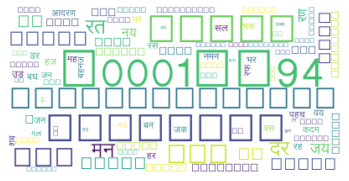

In [ ]:
word_cloud = WordCloud(font_path='Lohit-Devanagari.ttf',collocations = False, background_color = 'white').generate(txt_full4)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

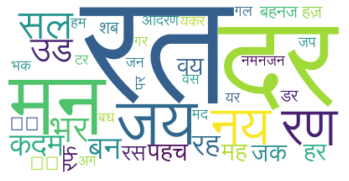

In [ ]:
word_cloud = WordCloud(font_path='Lohit-Devanagari.ttf',collocations = False, background_color = 'white').generate(emoji_pattern.sub(r'', txt_full4))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

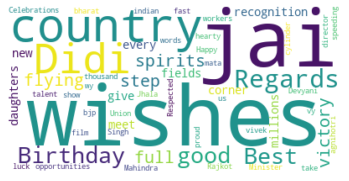

In [ ]:
txtt = GoogleTranslator(source='auto', target='en').translate(emoji_pattern.sub(r'', txt_full4))
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(txtt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

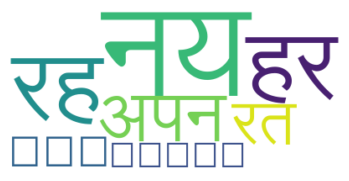

In [ ]:
text = "देश के हर कोने में,  दे रहा है देश की बेटियों को लाखों क्षेत्रों में अपनी प्रतिभा दिखाने के नये नये मौक़े hii hello" #"हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहचान। helllo hii h" 
word_cloud = WordCloud(font_path='Lohit-Devanagari.ttf',collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In every corner of the country, giving new opportunities to the daughters of the country to show their talent in millions of fields hi hello


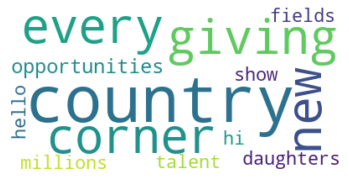

In [ ]:
txtt = GoogleTranslator(source='auto', target='en').translate(text)
print(txtt)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(txtt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
i=27
filename.text[i], filename.post_polarity[i]

('aap two seats goa congratulations best wishes capt venzy er cruz beginning honest politics goa',
 'neu')

In [ ]:
maxx = len(filename.post_polarity)
neg =0
for i in range(maxx):
  if(filename.post_polarity[i] == 'neg'):
    print(filename.text[i])
    print('----------------------')
    neg += 1

भाजपा का दिल्ली नगर निगम के चुनाव टालना शहीदों का अपमान है जिन्होंने अंग्रेजों को देश से भगाकर देश में जनतंत्र स्थापित करने के लिए कुरबानियाँ दीं थीं। आज ये हार के डर से दिल्ली नगर निगम के चुनाव टाल रहे हैं, कल ये राज्यों और देश के चुनाव टाल देंगे।

भाजपा MCD के चुनाव टाल रही है कि दिल्ली के तीनों निगम एक कर रहे है। क्या इस वजह से चुनाव टल सकते हैं? कल ये गुजरात हार रहे होंगे तो क्या ये कह कर टाल सकते हैं कि गुजरात और महाराष्ट्र को एक कर रहे हैं? क्या इसी तरह का कोई बहाना बना कर लोक सभा चुनाव टाले जा सकते हैं?

भाजपा अपने आप को दुनिया की सबसे बड़ी पार्टी कहती है। कमाल है। दुनिया की सबसे बड़ी पार्टी एक छोटी सी आम आदमी पार्टी से घबरा के भाग गयी? हिम्मत है तो MCD के चुनाव टाइम पे करवा के दिखाओ
----------------------
दिल्ली के सैनिक स्कूल का नाम शहीद भगत सिंह के नाम पर रखा जाएगा। Press Conference | LIVE

Delhi's Sainik School will be named after Shaheed Bhagat Singh. Press Conference | LIVE
----------------------
Addressing all the newly-elected AAP MLAs of Punjab via video conferencing | 

In [ ]:
maxx, neg

(55, 19)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
for path in path_old_lst:
  with open(path, 'rb') as fileObj:
    filename = pickle.load(fileObj)
  

#word to vec senti

In [ ]:
!pip install googletrans
#To translate from one language to another
!pip install deep_translator
!pip install langdetect
from langdetect import detect
import os

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def pre_process_str(text):
  text = remove_emojis(text) #remove emojis
  text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text) #remove links
  #text = re.sub(r'.!:?-"\/|', r'', text) 
  text = re.sub(' {2,}', ' ',text) # removes extra spaces
  text = ' '.join([token.lower() for token in text.split()]) # convert to lower languages
  return text

def pre_process_lst(lst):
  tmp = []

  for text in lst:
    tmp.append(pre_process_str(text))
  return tmp

def sentimate_analysis(txt):
  #sentiment=[]
  # if not(df.empty):
  #   for tweet in df.iloc[:,1]:

  if not txt:
    sentiment = None
  else:
    tweet = GoogleTranslator(source='auto', target='en').translate(txt)
    if(tweet is not None):
      sentence_ = Sentence(tweet)
    else:
      sentence_ = ''
    if len(str(sentence_))>0:
      model.predict(sentence_)
      if "POSITIVE" in str(sentence_):
        sentiment = "positive"
      elif "NEGATIVE" in str(sentence_):
        sentiment = "negative"
      else:
        sentiment  = "neutral"
    else:
      sentiment = "other"

  return sentiment

def sentimate_analysis_lst(lst):
  tmp = []
  for text in lst:
    tmp.append(sentimate_analysis(text))
  return tmp

In [ ]:
path_old = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle_v2/'
path_new = '/content/drive/MyDrive/Colab-Notebooks/IR/Project/person_wise_tweets_pickle_v3_onlylaters/'

In [ ]:
model = TextClassifier.load('en-sentiment')

In [ ]:
import re
filename = load_data(str('SmritiIraniOfficial'), path_old)

filename['processed_posts'] = filename.text.apply(pre_process_str)
filename['processed_comments_lst'] = filename.comments_lst.apply(pre_process_lst)

In [ ]:
filename[['processed_posts', 'post_polarity']]

,processed_posts,post_polarity
0,production linked incentive (pli) scheme has b...,positive
1,"हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहच...",positive
2,production linked incentive (pli) scheme has b...,positive
3,"हौसलों की भर रही उड़ान, कदम बन रहें जीत की पहच...",positive
4,देवभूमि उत्तराखंड के मुख्यमंत्री के रूप में शप...,positive
5,मातृभूमि की स्वतंत्रता के लिए अपना सर्वस्व समर...,positive
6,as a parent you are always on the lookout for ...,positive
7,participated in united nations #csw66 side-eve...,positive
8,congratulations to n.biren singh ji on taking ...,positive
9,bringing india's lost heritage back home! 29 a...,positive


In [ ]:
filename['post_polarity'] = filename.processed_posts.apply(sentimate_analysis)
filename['comments_polarity_lst'] = filename.comments_lst.apply(sentimate_analysis_lst)

store_data(filename, str('SmritiIraniOfficial'), path_new)

maxx = len(filename.post_polarity)
neg =0
for i in range(maxx):
  if(filename.post_polarity[i] == 'neg'):
    print(filename.text[i])
    print('----------------------')
    neg += 1
neg

2022-04-27 16:07:29,053 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:07:29,056 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:07:29,059 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:07:29,063 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:10:04,494 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:10:26,194 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:11:30,760 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:13:24,104 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:13:24,106 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2022-04-27 16:13:24,255 Warning: An empty Sentence was 

NotValidPayload: ignored

In [ ]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")